In [2]:
%load_ext autoreload

In [24]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")
MODULES_PATH = os.path.join(BASE_PATH, "modules")

In [26]:
sys.path.append(MODULES_PATH)

In [27]:
%autoreload 2
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer, plot_in_steps

In [31]:
experiment_path = os.path.join(METRICS_PATH, "y_gal_mc_mean")
metrics_handler = ExperimentSuitMetrics(experiment_path)
metrics = MetricsTransformer()

In [32]:
dtypes = {
    "query_time": float,
    "eval_loss": float,
    "eval_accuracy": float,
    "eval_time": float, 
    "iteration": int,
    "labeled_pool_size": int
}

In [45]:
df_mc_dropout = metrics.load_from_dir(metrics_handler, "0_mc_dropout", dtype=dtypes)
# df_mp = metrics.load_from_dir(metrics_handler, "moment_propagation", dtype=dtypes)

Text(650.4352941176471, 0.5, 'Eval Loss')

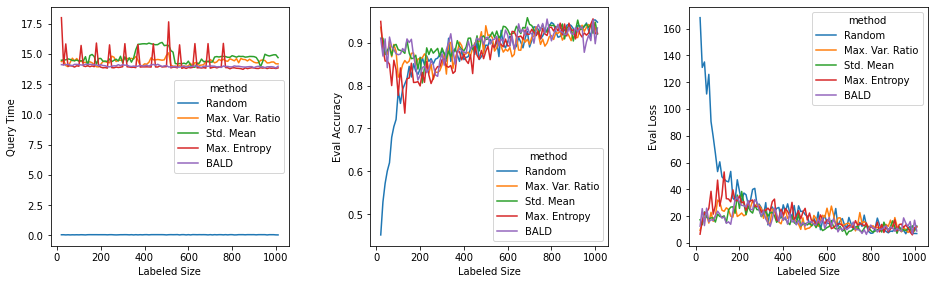

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
plt.tight_layout(pad=5)

sns.lineplot(ax=ax[0], data=df_mc_dropout, y="query_time", x="labeled_pool_size", hue="method")
ax[0].set_xlabel("Labeled Size")
ax[0].set_ylabel("Query Time")

acc_filter = df_mc_dropout["eval_accuracy"] > .8
sns.lineplot(ax=ax[1], data=df_mc_dropout, y="eval_accuracy", x="labeled_pool_size", hue="method")
ax[1].set_xlabel("Labeled Size")
ax[1].set_ylabel("Eval Accuracy")

sns.lineplot(ax=ax[2], data=df_mc_dropout, y="eval_loss", x="labeled_pool_size", hue="method")
ax[2].set_xlabel("Labeled Size")
ax[2].set_ylabel("Eval Loss")


In [16]:
pd.unique(df_mc_dropout.method)

array(['Random', 'Max. Var. Ratio', 'Std. Mean', 'Max. Entropy', 'BALD'],
      dtype=object)

In [17]:
random_selector = df_mc_dropout["method"] == "Random"
max_entropy_selector = df_mc_dropout["method"] == "Max. Entropy"

In [20]:
loss_random = MetricsTransformer.list_to_series(df_mc_dropout[random_selector], "train_loss")
loss_max_entropy = MetricsTransformer.list_to_series(df_mc_dropout[max_entropy_selector], "train_loss")

In [21]:
loss_max_entropy

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,27.794989,84.116837,85.171310,68.989517,65.187943,76.472534,57.448315,48.792725,52.167091,54.925758,...,23.871786,26.566809,28.113134,27.236523,35.735912,23.013414,27.267042,31.268011,24.567852,29.581703
1,14.759066,40.161751,55.719994,22.888016,33.673477,46.429939,37.106102,23.609472,39.665791,25.258148,...,25.693829,23.449907,27.690382,26.429098,23.315317,20.518076,22.924494,23.022797,22.772976,22.803684
2,12.647509,27.395632,18.544857,24.158833,16.169069,22.056648,14.756128,19.594187,18.814777,39.623398,...,21.475887,24.096668,24.261883,21.991404,23.808187,23.792719,20.949171,21.614710,20.988605,25.288494
3,12.469379,14.042477,19.610170,17.393398,13.512030,10.556989,12.875092,10.159862,14.543593,14.242385,...,21.557905,23.560528,23.532852,26.576654,21.752380,24.923796,24.351082,23.305208,22.364244,26.843472
4,17.905554,11.076719,14.934069,11.778110,10.798837,14.551836,9.765102,11.349410,10.463356,17.505238,...,20.924166,22.973074,22.717211,23.407568,22.781246,19.934017,23.242281,23.491602,23.816460,23.212494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.920218,11.408010,11.258968,10.505527,10.168335,9.752428,9.803276,9.676467,10.096444,10.522113,...,20.748655,23.039566,20.348045,21.759865,19.134390,19.844301,22.622807,20.773848,22.283285,20.638222
96,10.897999,12.035501,11.236822,10.486193,10.137422,9.764198,10.054462,9.700124,10.674089,10.589044,...,19.698757,25.195070,24.773415,20.732313,18.811064,20.322672,21.848276,22.549200,21.681993,21.353678
97,10.875543,11.355420,11.213923,10.465724,10.149506,9.725382,10.299940,9.648055,10.287766,10.359190,...,19.963669,22.227262,21.775156,21.790365,21.169226,19.616432,21.685688,21.597095,22.075743,21.589949
98,10.855984,11.332232,11.193077,10.445364,10.150862,9.712884,9.749417,9.637674,10.032732,10.617983,...,19.393843,21.010017,20.443039,21.723642,18.599163,20.368292,21.097248,20.739752,22.050222,20.526987


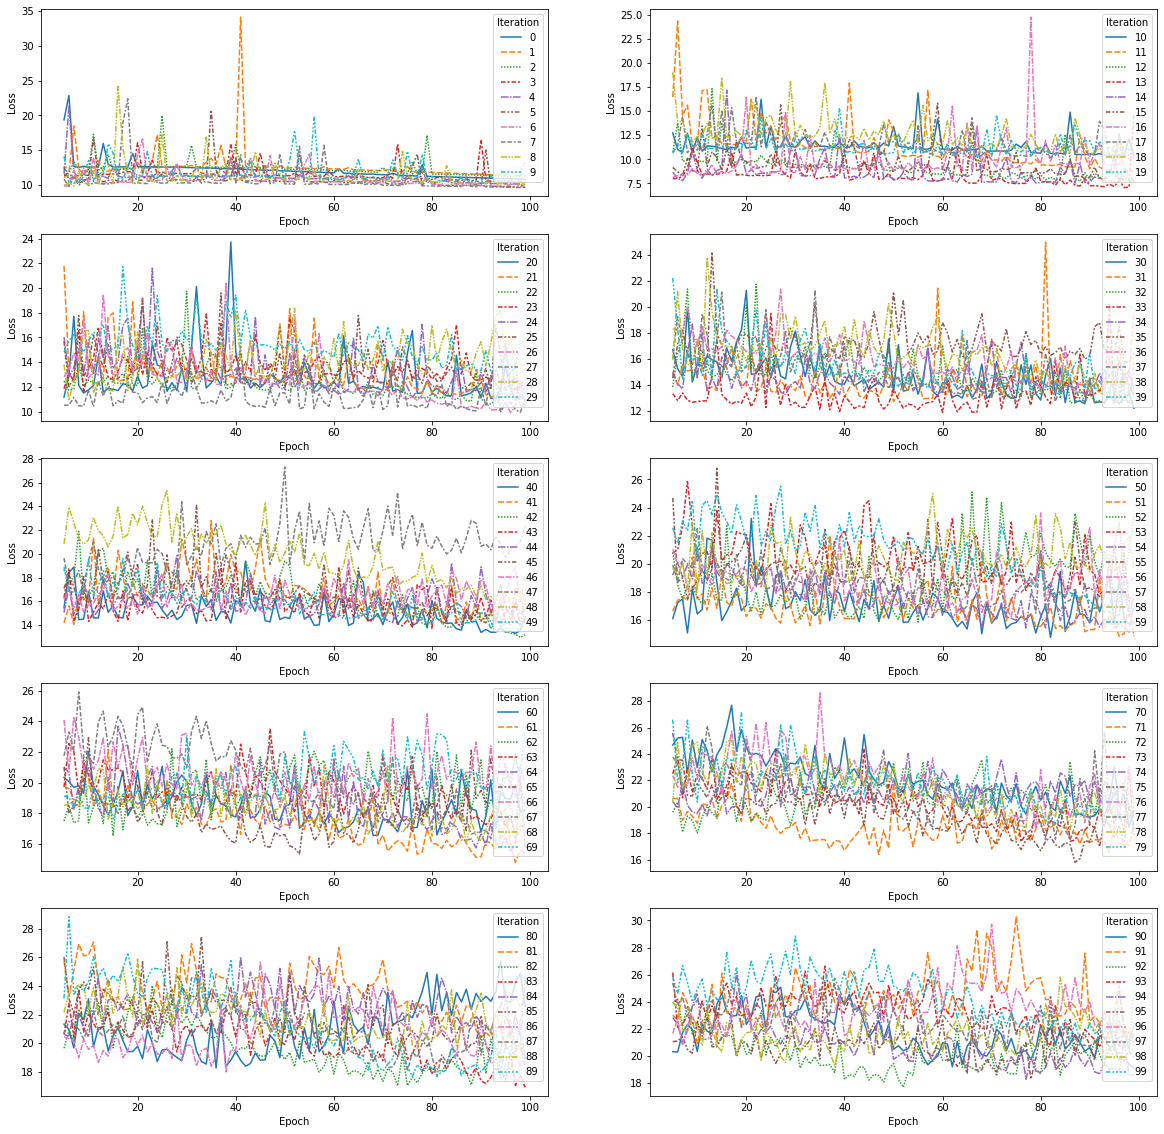

In [22]:
plot_in_steps(loss_max_entropy, 10, 10, num_columns=2, from_epoch=5, figsize=(20, 20))

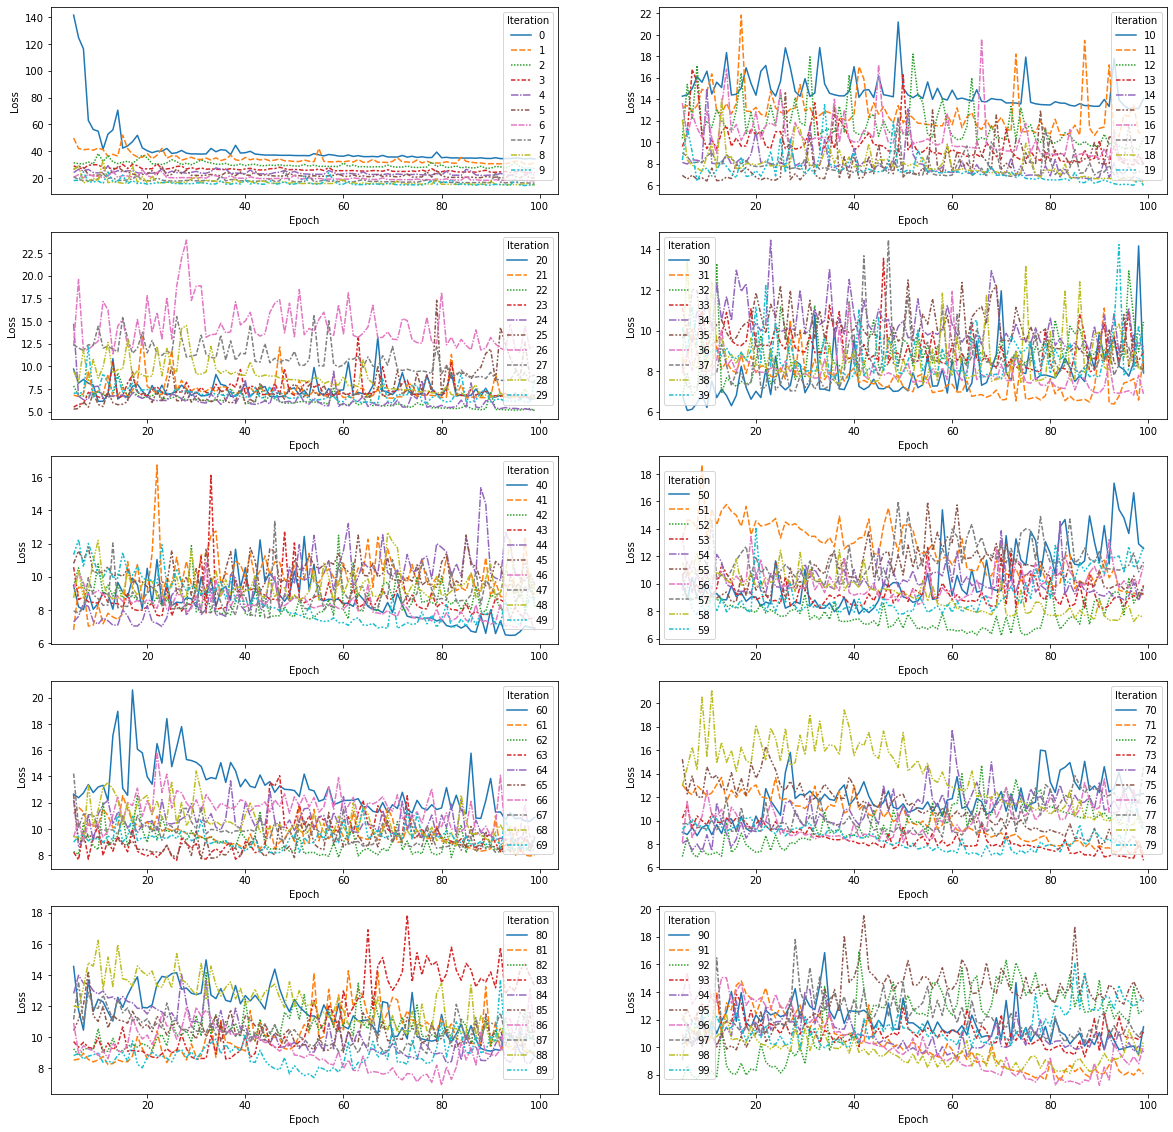

In [23]:
plot_in_steps(loss_random, 10, 10, num_columns=2, from_epoch=5, figsize=(20, 20))